<a href="https://colab.research.google.com/github/pkroy1991/1806/blob/master/Basics_of_Optimization_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

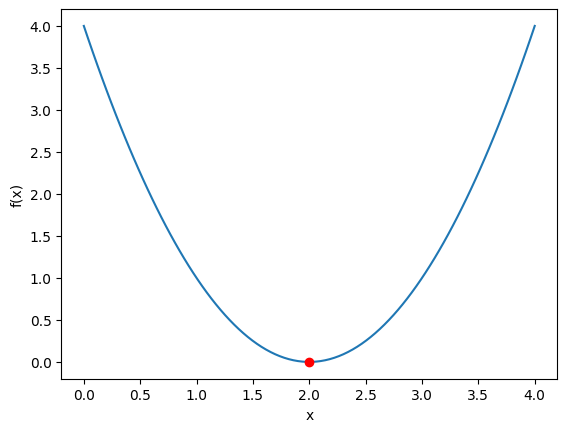

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function
def f(x):
  return (x - 2)**2

# Create a list of x-values
x = np.linspace(0, 4, 100)

# Create a list of y-values
y = f(x)

# Find the minimum of the function
x_min = 2

# Plot the function
plt.plot(x, y)

# Plot the minimum point
plt.plot(x_min, f(x_min), 'ro')

# Label the axes
plt.xlabel('x')
plt.ylabel('f(x)')

# Show the plot
plt.show()


--2025-01-15 04:05:57--  https://www.dropbox.com/scl/fi/s1jmfh0fvr1g03r5ndbl2/AAPL.csv?rlkey=vp9lsnzzmzxufv23tbb1xbi6f
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc30bc05e09d3a8bf2538b3bbe83.dl.dropboxusercontent.com/cd/0/inline/CiOtxONa1qD0OuxJvRQavzQrHiQlg767vWzUH6hEyZutjDdbpXguyCx0g7F9Uc0KPAIx_FPfIHavPfTmLE4oBXJJ8Qdw7sc34h8Llw-x9OU-z_YivyKHfAz64QCZxVVpZt4/file# [following]
--2025-01-15 04:05:58--  https://uc30bc05e09d3a8bf2538b3bbe83.dl.dropboxusercontent.com/cd/0/inline/CiOtxONa1qD0OuxJvRQavzQrHiQlg767vWzUH6hEyZutjDdbpXguyCx0g7F9Uc0KPAIx_FPfIHavPfTmLE4oBXJJ8Qdw7sc34h8Llw-x9OU-z_YivyKHfAz64QCZxVVpZt4/file
Resolving uc30bc05e09d3a8bf2538b3bbe83.dl.dropboxusercontent.com (uc30bc05e09d3a8bf2538b3bbe83.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f
Connecting to uc30bc05e09

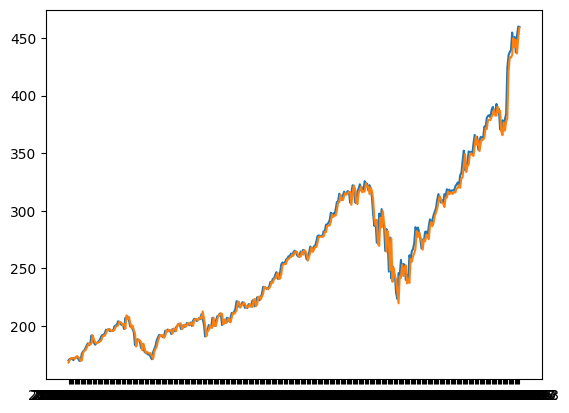

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!wget -O AAPL.csv https://www.dropbox.com/scl/fi/s1jmfh0fvr1g03r5ndbl2/AAPL.csv?rlkey=vp9lsnzzmzxufv23tbb1xbi6f&dl=0
Stock = pd.read_csv('AAPL.csv',  index_col=0)

# Remove the date column
Stock = Stock.drop(columns='Date_col')
features = Stock.drop(columns=['Close_forcast'],axis=1)
target = Stock['Close_forcast']

# test-train split
train_split = int(Stock.shape[0]*0.9)
X_train, X_test = features[:train_split], features[train_split:]
Y_train, Y_test = target[:train_split], target[train_split:]

# use numpy least squares function to estimate w (ignore b)
w = np.linalg.lstsq(X_train, Y_train, rcond=None)[0]
Y_test_pred = X_test.dot(w);

plt.plot(Y_test)
plt.plot(Y_test_pred)
plt.show()

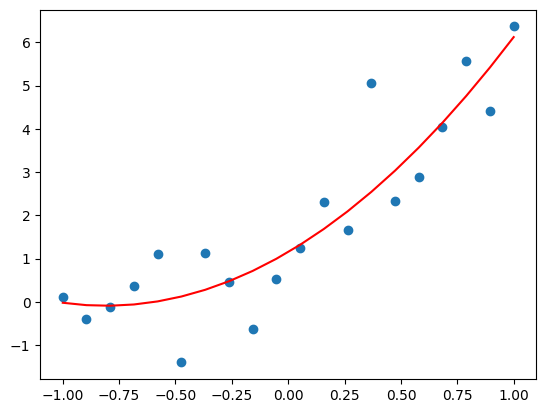

Fitted parameters:
a = 1.8975487122833044
b = 3.0708556744816584
c = 1.1532473204495424


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the function to fit
def parabola(x, a, b, c):
  return a * x**2 + b * x + c

# Generate some data
x = np.linspace(-1, 1, 20)
y = parabola(x, 2, 3, 1) + np.random.randn(20)

# Fit the data to the parabola
popt, pcov = curve_fit(parabola, x, y)

# Plot the data and the fitted curve
plt.plot(x, y, 'o')
plt.plot(x, parabola(x, *popt), 'r-')
plt.show()

# Print the fitted parameters
print('Fitted parameters:')
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])


f(4.0) = 64.000
[-2.  -1.9 -1.8 -1.7 -1.6]
[40.     33.6091 27.9936 23.0911 18.8416]
f(-2.000) = 40.000
f(-1.900) = 33.609
f(-1.800) = 27.994
f(-1.700) = 23.091
f(-1.600) = 18.842


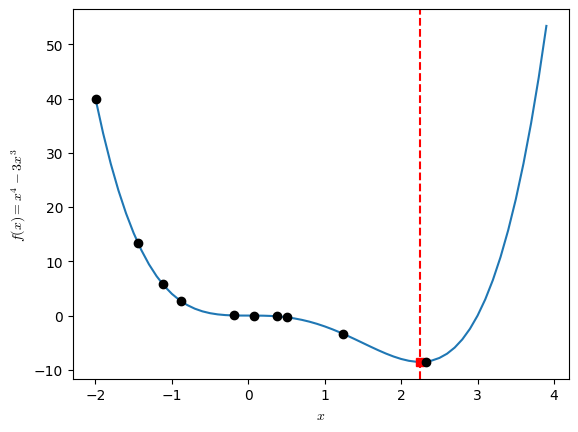

In [ ]:
from numpy import arange
from matplotlib import pyplot
from numpy.random import seed
from numpy.random import rand

def f(val):
  return val**4 - 3*val**3

z = 4.0
print(f'f({z}) = {f(z):.3f}')

# define range for input
r_min, r_max = -2.0, 4.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max, 0.1)
# summarize some of the input domain
print(inputs[:5])

# compute targets
results = f(inputs)
# summarize some of the results
print(results[:5])

for i in range(5):
  print('f(%.3f) = %.3f' % (inputs[i], results[i]))

# create a line plot of input vs result
pyplot.plot(inputs, results)


optima_x = 9.0/4.0
optima_y = f(optima_x)
pyplot.plot([optima_x], [optima_y], 's', color='r')
pyplot.axvline(x=optima_x, ls='--', color='red')

# lets put some samples
seed(1)
sample = r_min + rand(10) * (r_max - r_min)
# evaluate the sample
sample_eval = f(sample)
pyplot.plot(sample, sample_eval, 'o', color='black')

pyplot.xlabel("$x$",math_fontfamily='cm')
pyplot.ylabel("$f(x)=x^4-3x^3$",math_fontfamily='cm')

# show the plot
pyplot.show()

Best: f(-0.08427) = 0.00710


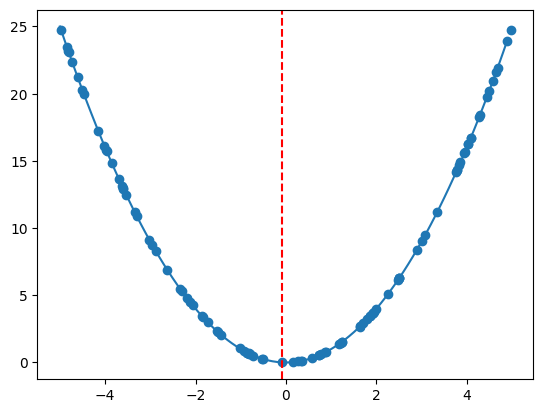

In [ ]:
from numpy import arange
from numpy.random import rand
from matplotlib import pyplot

# objective function
def objective(x):
  return x**2.0

# define range for input
r_min, r_max = -5.0, 5.0

# generate a random sample from the domain
sample = r_min + rand(100) * (r_max - r_min)

# evaluate the sample
sample_eval = objective(sample)

# locate the best solution
best_ix = 0
for i in range(len(sample)):
  if sample_eval[i] < sample_eval[best_ix]:
    best_ix = i

# summarize best solution
print('Best: f(%.5f) = %.5f' % (sample[best_ix], sample_eval[best_ix]))

# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max, 0.1)

# compute targets
results = objective(inputs)

# create a line plot of input vs result
pyplot.plot(inputs, results)

# plot the sample
pyplot.scatter(sample, sample_eval)

# draw a vertical line at the best input
pyplot.axvline(x=sample[best_ix], ls='--', color='red')

# show the plot
pyplot.show()

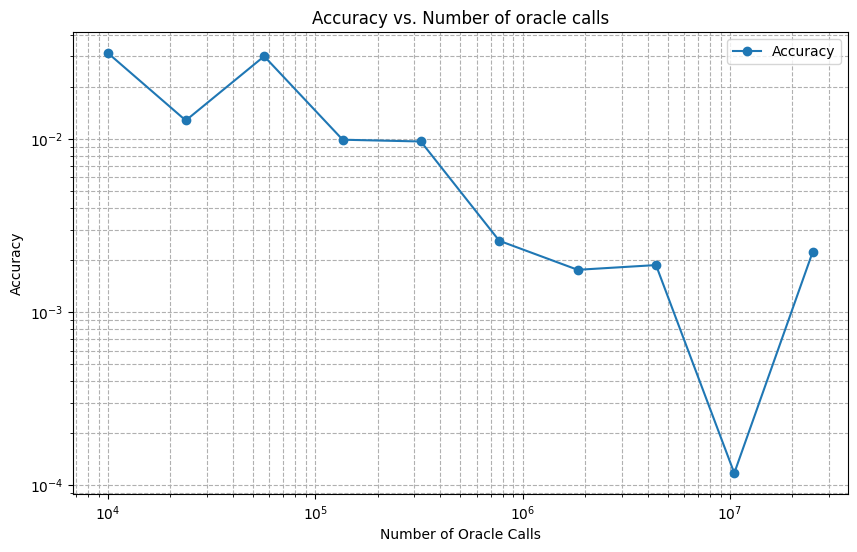

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Objective function
def obj(x, y, a):
    return (x-a)**2 + 5*(y-x**2)**2

def gridsearch(a, n_points):
    # Input range
    min_r, max_r = -5, 5

    # Generate grid samples
    x = np.linspace(min_r, max_r, n_points)
    y = np.linspace(min_r, max_r, n_points)
    grid = [(xi, yi) for xi in x for yi in y]

    # Evaluate samples
    evals = [obj(x, y, a) for x, y in grid]

    # Find best solution
    best_idx = evals.index(min(evals))
    best_x, best_y = grid[best_idx]

    # Calculate accuracy as the Euclidean distance between found min and actual min
    return np.sqrt((best_x - a)**2 + (best_y - a**2)**2)

# Generating n_points values from 100 to 10,000 in logarithmic scale
n_points_values = np.logspace(np.log10(100), np.log10(5000), num=10, dtype=int)

# Initialize a list to store accuracies
accuracies = []

# Perform grid search for each n_points value
a = random.random()  # Random value of 'a' for all runs
for n_points in n_points_values:
    acc = gridsearch(a, n_points)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_points_values**2, accuracies, '-o', label='Accuracy')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Number of Oracle Calls')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of oracle calls')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

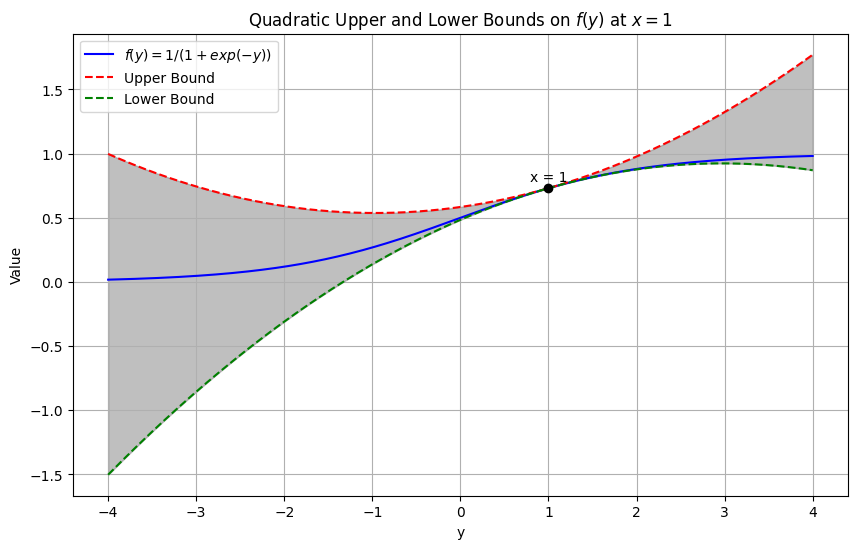

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit # expit is the sigmoid function

# Define the function f(x) = 1 / (1 + exp(-x))
def f(x):
    return expit(x)

# Define the derivative of f, f'(x) = f(x) * (1 - f(x))
def df(x):
    return f(x) * (1 - f(x))

# Define the quadratic upper and lower bounds
def upper_bound(x, y):
    return f(x) + df(x) * (y - x) + 0.05 * (y - x)**2

def lower_bound(x, y):
    return f(x) + df(x) * (y - x) - 0.05 * (y - x)**2

# Set x = 1 for the bounds
x = 1

# Generate a range of y values around 1
y_values = np.linspace(-4, 4, 400)

# Calculate the function value, upper bound, and lower bound for all y values
f_values = f(y_values)
upper_values = upper_bound(x, y_values)
lower_values = lower_bound(x, y_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_values, f_values, label='$f(y) = 1 / (1 + exp(-y))$', color='blue')
plt.plot(y_values, upper_values, label='Upper Bound', linestyle='--', color='red')
plt.plot(y_values, lower_values, label='Lower Bound', linestyle='--', color='green')
plt.fill_between(y_values, lower_values, upper_values, color='gray', alpha=0.5)
plt.scatter([x], [f(x)], color='black', zorder=5) # Mark the point x=1
plt.text(x, f(x) + 0.05, 'x = 1', horizontalalignment='center')
plt.xlabel('y')
plt.ylabel('Value')
plt.title('Quadratic Upper and Lower Bounds on $f(y)$ at $x = 1$')

plt.legend()
plt.grid(True)
plt.show()


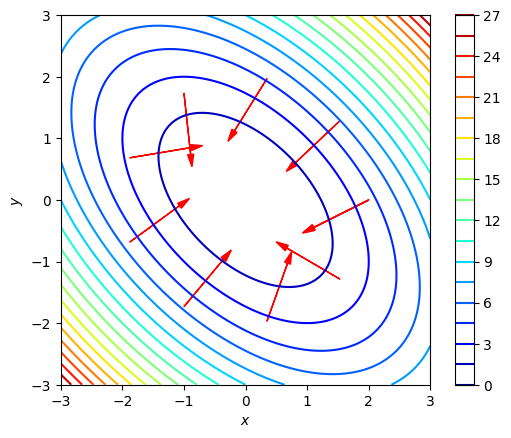

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    Q = np.array([[2, 1], [1, 2]])
    Z = np.zeros_like(x)

    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            xy = np.array([x[i, j], y[i, j]])
            Z[i, j] = 0.5 * np.dot(xy, np.dot(Q, xy))

    return Z

# Gradient function (assuming same quadratic form)
def g(x):
  # random positive definite matrix
  #A = np.random.randn(2, 2)
  #P = A.T @ A
  Q = np.array([[2, 1], [1, 2]])
  return  Q @ x

x = np.linspace(-3.0, 3.0, 100)
y = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, levels=20, cmap='jet')
plt.colorbar()
plt.xlabel("$x$")
plt.ylabel("$y$")

# Parameters
num_points = 10  # Number of points/arrows
radius = 2       # Radius of the circle

# Generate points in a circular region
angles = np.linspace(0, 2*np.pi, num_points)
points = np.array([radius * np.cos(angles), radius * np.sin(angles)]).T

# Plotting
for x in points:
    gx = g(x)
    df = -gx / np.linalg.norm(gx)
    plt.arrow(x[0], x[1], df[0], df[1], head_width=0.1, head_length=0.2, fc='red', ec='red')

# Set plot limits and labels
plt.gca().set_aspect('equal', adjustable='box')  # Ensure circle shape is preserved
plt.show()

eta =  0.125
iter = 0 f(x) =  0.8125 orcalls =  4
eta =  0.5
iter = 1 f(x) =  0.59765625 orcalls =  6
eta =  0.25
iter = 2 f(x) =  0.19478899240493774 orcalls =  9
eta =  0.5
iter = 3 f(x) =  0.1649465723551726 orcalls =  11
eta =  0.25
iter = 4 f(x) =  0.1250494981258304 orcalls =  14
eta =  0.125
iter = 5 f(x) =  0.06717081999786602 orcalls =  18
eta =  0.5
iter = 6 f(x) =  0.05789852193299021 orcalls =  20
eta =  0.125
iter = 7 f(x) =  0.03544922906574982 orcalls =  24
eta =  0.25
iter = 8 f(x) =  0.02918463350720871 orcalls =  27
eta =  0.25
iter = 9 f(x) =  0.02564443288127597 orcalls =  30
eta =  0.25
iter = 10 f(x) =  0.025253691360453204 orcalls =  33
eta =  0.125
iter = 11 f(x) =  0.016574875346575278 orcalls =  37
eta =  0.25
iter = 12 f(x) =  0.01434473056646944 orcalls =  40
eta =  0.25
iter = 13 f(x) =  0.0140855221840693 orcalls =  43
eta =  0.125
iter = 14 f(x) =  0.009731067868298788 orcalls =  47
eta =  0.25
iter = 15 f(x) =  0.008364172289157364 orcalls =  50
eta =  0

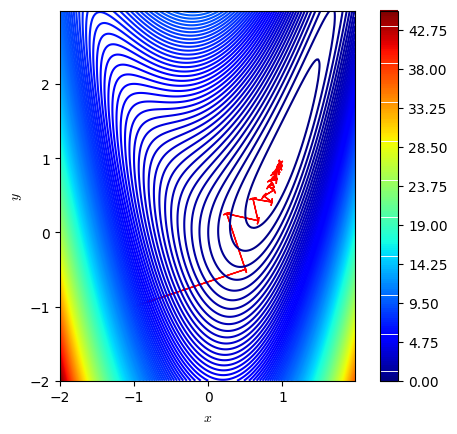

In [ ]:
from numpy import arange, meshgrid
from matplotlib.animation import FuncAnimation
from numpy.random import seed, rand
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import copy
import math
from scipy import optimize as opt


# objective function
def f(x):
  # Rosenbrock function
  return (x[0]-1)**2 + 1*(x[1]-x[0]**2)**2

def grad(x):
  return np.array([2*(x[0]-1.0) + 2.0*(x[0]**2.0-x[1])*2.0*x[0], 2.0*(x[1]-x[0]**2)])

def secant_method(feta, x0, x1, tol=1e-3, max_iter=1000):
    for iter in range(max_iter):
        if abs(feta(x1) - feta(x0)) < 1e-10:
            return x0, max_iter

        x2 = x1 - feta(x1) * (x1 - x0) / (feta(x1) - feta(x0))

        if abs(x2 - x1) < tol:
            return x1, iter

        x0, x1 = x1, x2

    return x1, max_iter

# Prepare for plotting
xrange_start, xrange_end = -2.0, 2.0
yrange_start, yrange_end = -2.0, 3.0
x_axis = arange(xrange_start, xrange_end, 0.02)
y_axis = arange(yrange_start, yrange_end, 0.02)
# create a mesh from the axis
x_mesh, y_mesh = meshgrid(x_axis, y_axis)
# compute targets
z_values = f([x_mesh, y_mesh])

# create a filled contour plot with 50 levels and jet color scheme
contour = plt.contour(x_mesh, y_mesh, z_values, levels=201, cmap='jet')
plt.xlabel("$x$", math_fontfamily='cm')
plt.ylabel("$y$", math_fontfamily='cm')
plt.colorbar(contour)
#plt.show()

xinit = [-1.0,-1.0]    # initialization
maxiter = 5000;
#eta = 0.2
x = xinit
orcall = 0;
for iter in range(maxiter):
  #eta = min(0.18, 1/((iter+1)**0.5))

  g = grad(x)
  feta = lambda eta: f(x-eta*g)

  #eta,_,_,calls = opt.brent(feta, brack=(0.000001,1), full_output=True, tol=1e-3)

  eta = 1
  calls = 1;
  while feta(eta)>f(x)-0.0001*np.linalg.norm(g):
    eta = eta/2
    calls = calls+1

  #eta,calls = secant_method(feta, 0.001, .2, tol = 1e-2)
  print('eta = ',eta)
  orcall = orcall + calls
  dx = - eta*g

  plt.arrow(x[0], x[1], dx[0], dx[1], head_width=0.1, head_length=0.01, fc='red', ec='red')
  plt.gca().set_aspect('equal', adjustable='box')
  x = x + dx
  print('iter =', iter, 'f(x) = ', f(x),'orcalls = ',orcall)

  #plt.show()
  #alpha = np.linspace(0.001,.7, 1000)
  #g = grad(x)
  #fi = np.zeros_like(alpha)
  #for i in range(len(alpha)):
  #  fi[i] = f(x-alpha[i]*g)
  #plt.plot(alpha, fi)
  #plt.xlabel("$\eta$", math_fontfamily='cm')
  #plt.ylabel("$f(\mathbf{x}_t-\eta\\nabla f(\mathbf{x}_t))$", math_fontfamily='cm')
  #break

  if f(x)<1e-3:
    break

plt.show()

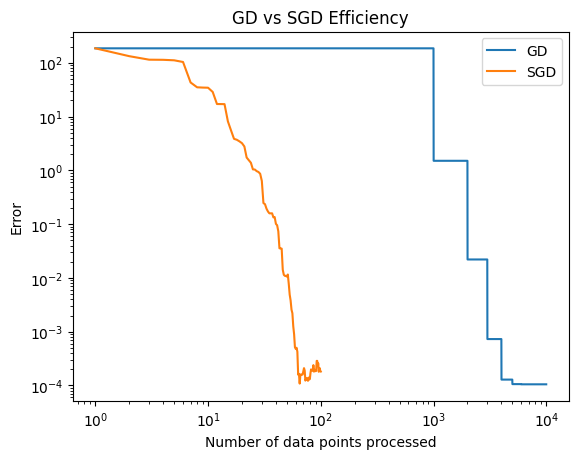

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
xstar = np.random.randn(n, 1)
B = np.random.randn(n, 3)

N = 1000
# generate dataset
A = B @ np.random.randn(3, N)
b = A.T @ xstar + np.random.randn(N, 1) * 0.01

x0 = np.random.randn(n, 1)

# GD
T = 10
x = x0.copy()
f = np.zeros(T)
alpha = 0.01
for t in range(T):
    res = A.T @ x - b
    f[t] = np.linalg.norm(res)**2 / N
    x = x - alpha * A @ res / N

fgd = np.repeat(f, N)

# SGD
x = x0.copy()
Ts = 100
f = np.zeros(Ts)
alpha = 0.002
for t in range(Ts):
    i = np.random.randint(N)
    res = A.T @ x - b
    f[t] = np.linalg.norm(res)**2 / N
    x = x - alpha * A[:, i:i+1] * res[i]

fsgd = f

# Plotting
plt.loglog(np.arange(1, N*T+1), fgd, label='GD')
plt.loglog(np.arange(1, Ts+1), fsgd, label='SGD')
plt.legend()
plt.xlabel('Number of data points processed')
plt.ylabel('Error')
plt.title('GD vs SGD Efficiency')
plt.show()


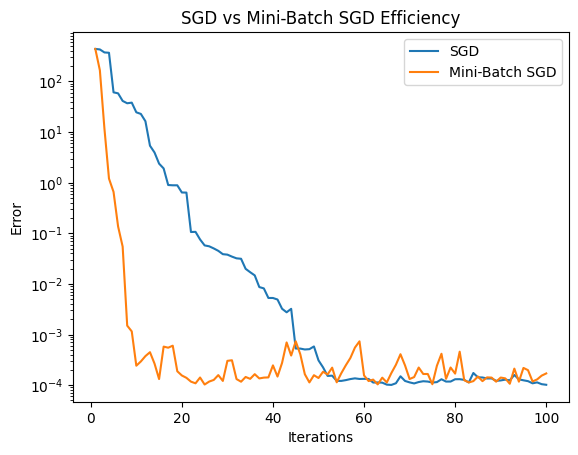

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
xstar = np.random.randn(n, 1)
B = np.random.randn(n, 3)

N = 1000
# generate dataset
A = B @ np.random.randn(3, N)
b = A.T @ xstar + np.random.randn(N, 1) * 0.01

x0 = np.random.randn(n, 1)

# SGD
x = x0.copy()
Ts = 100
f_sgd = np.zeros(Ts)
alpha = 0.002
for t in range(Ts):
    i = np.random.randint(N)
    res = A.T @ x - b
    f_sgd[t] = np.linalg.norm(res)**2 / N
    x = x - alpha * A[:, i:i+1] * res[i]

# Mini-Batch SGD
x = x0.copy()
batch_size = 8
Tm = 100
f_mbatch = np.zeros(Tm)
alpha = 0.01
for t in range(Tm):
    indices = np.random.choice(N, batch_size, replace=False)
    res = A.T @ x - b
    f_mbatch[t] = np.linalg.norm(res)**2 / N
    grad = np.sum(A[:, indices] @ (res[indices, :]), axis=1, keepdims=True) / batch_size
    x = x - alpha * grad

# Plotting
plt.semilogy(np.arange(1, Ts+1), f_sgd, label='SGD')
plt.semilogy(np.arange(1, Tm+1), f_mbatch, label='Mini-Batch SGD')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('SGD vs Mini-Batch SGD Efficiency')
plt.show()
